In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
import numpy as np
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from operator import itemgetter
from qiskit.circuit.library import MCMT

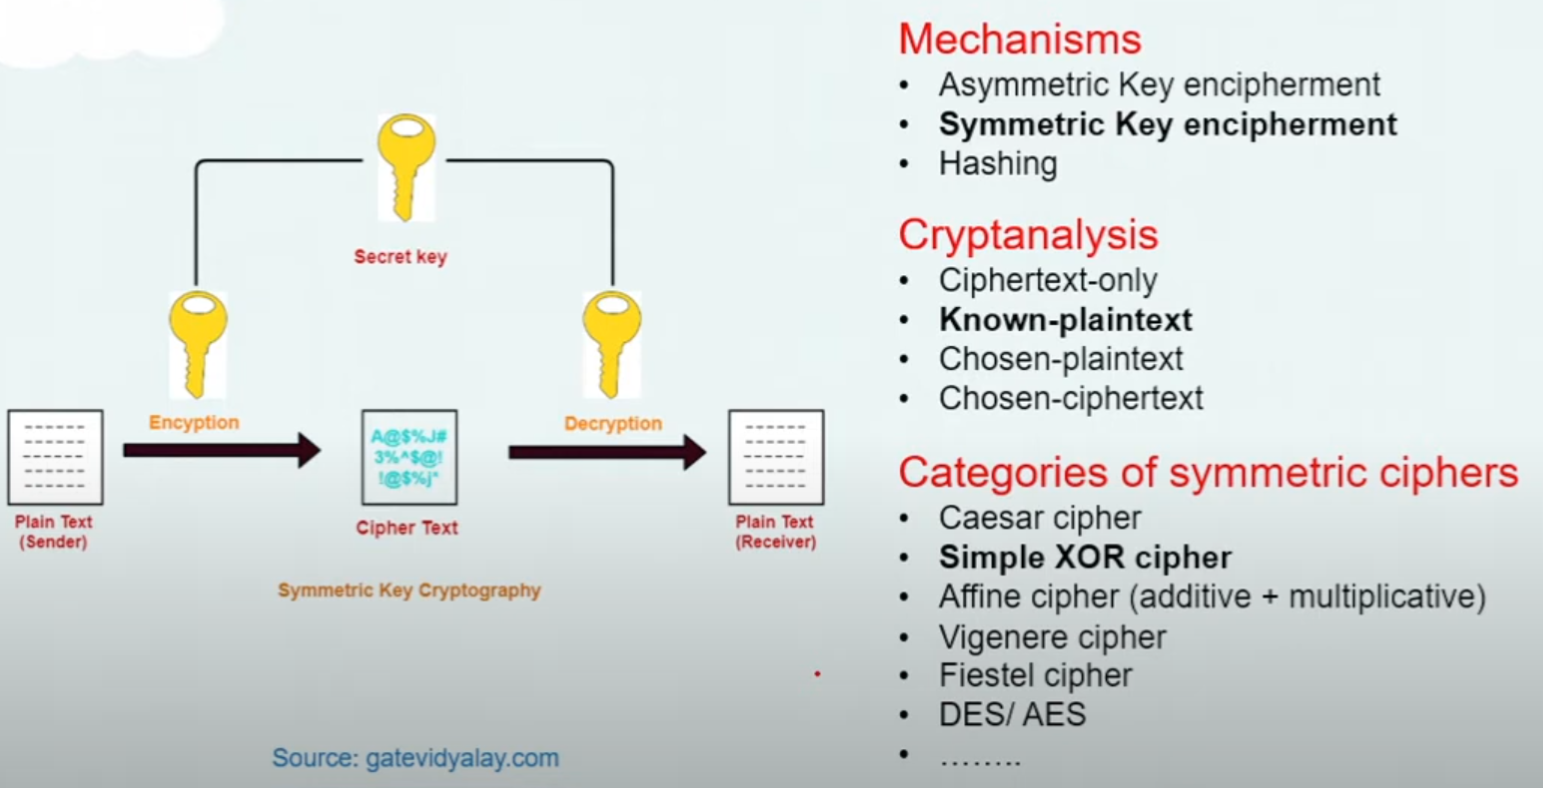

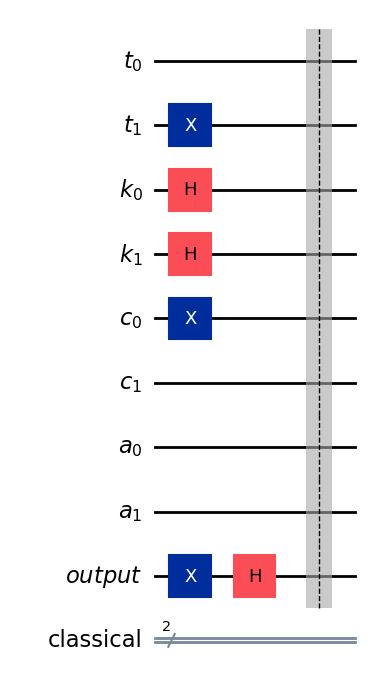

In [23]:
key = QuantumRegister(2, name='k')
plain_text = QuantumRegister(2, name='t')
cipher_text = QuantumRegister(2, name='c')
ancilla = QuantumRegister(2, name='a')
output = QuantumRegister(1, name='output')
classical = ClassicalRegister(2, name='classical')
qc = QuantumCircuit(plain_text, key, cipher_text, ancilla, output, classical)

for i in range(2):
    qc.h(key[i])

qc.x(plain_text[1])
qc.x(cipher_text[0])
qc.x(output)
qc.h(output)
qc.barrier()

qc.draw(output='mpl')

In [24]:
def oracle():
    qc.cx(key[0], plain_text[0])
    qc.cx(cipher_text[0], ancilla[0])
    qc.cx(key[1], plain_text[1])
    qc.cx(cipher_text[1], ancilla[1])
    qc.cx(plain_text[0], ancilla[0])
    qc.cx(plain_text[1], ancilla[1])
    qc.x(ancilla[0])
    qc.x(ancilla[1])
    qc.mcx(ancilla, output)

    # qc.x(ancilla[0])
    # qc.x(ancilla[1])
    qc.barrier()

# oracle()
# qc.draw(output='mpl')

In [25]:
def diffuser():
    # Apply H-gates
    qc.h(key[0])
    qc.h(key[1])

    qc.z(key[0])
    qc.z(key[1])
    qc.cz(key[0], key[1])

    # qc.z(range(n))
    # Apply H-gates
    qc.h(key[0])
    qc.h(key[1])

    qc.barrier()
    return qc

# diffusion_operator(2)
# qc.draw(output='mpl')

In [26]:
n = 3
for i in range (n):
    oracle()
    diffuser()

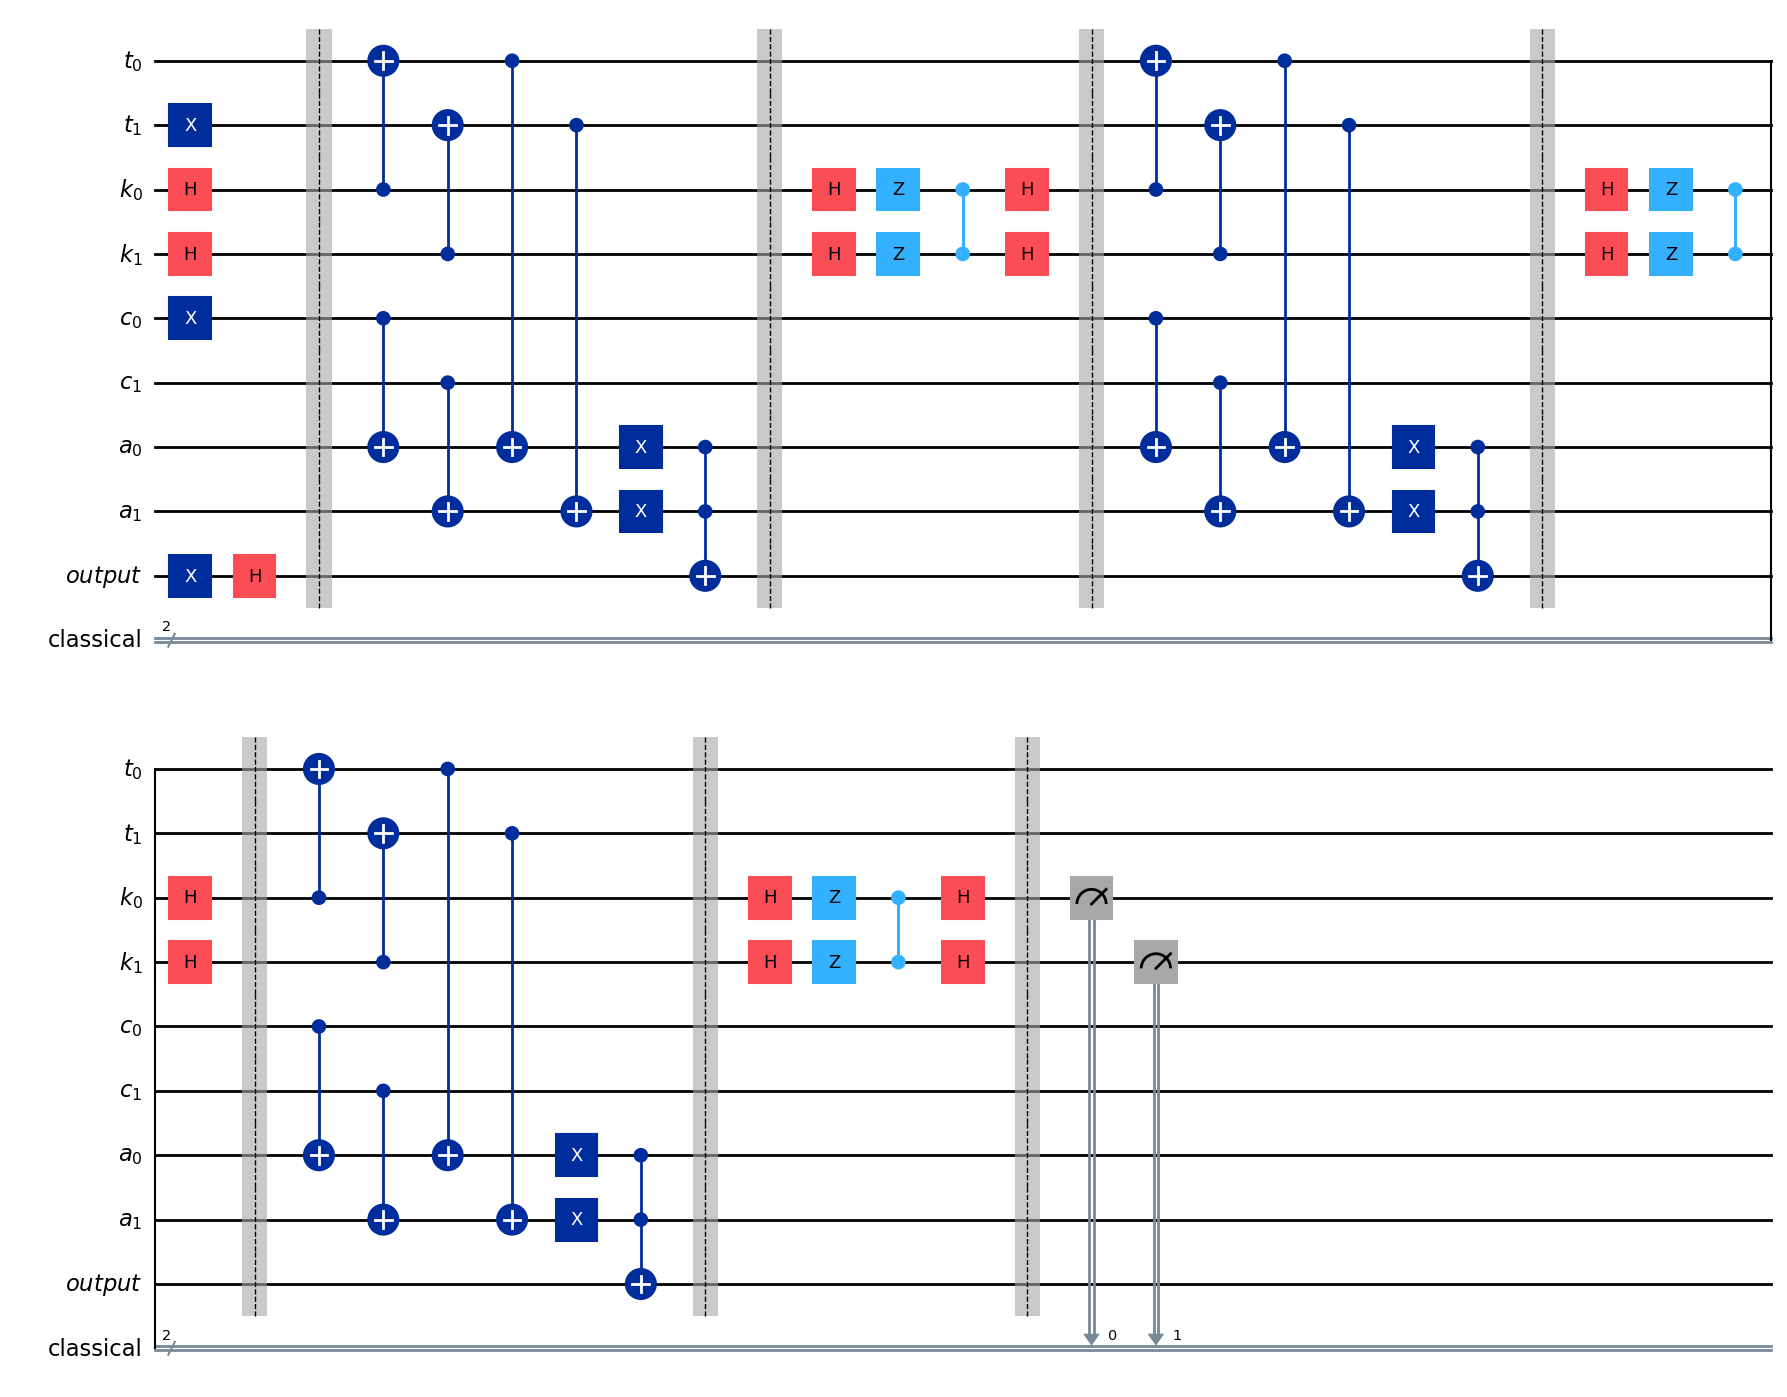

In [27]:
qc.measure(key, classical)
qc.draw(output='mpl')

Counts: {'11': 1024}


C:\Users\26550\AppData\Local\Temp\ipykernel_13516\3928821450.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


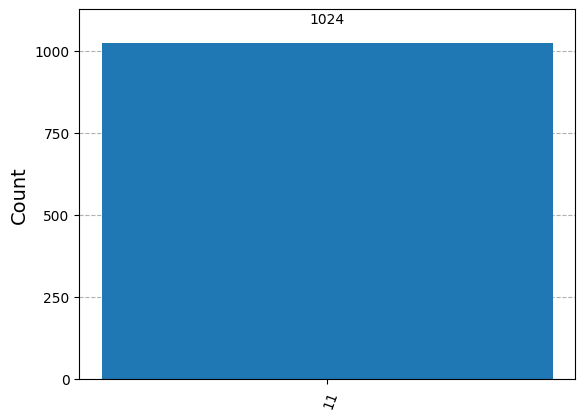

In [28]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)
print("Counts:", counts)

# Plot the result
plot_histogram(counts)